## Predict climbing strength:  "The V grade you can send 90-100% of routes" (Any information)

## Preprocessing

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [2]:
def formatCode(csvFile):
    Data = pd.read_csv(csvFile)
    y = Data['Hardest_V_Grade_ever_climbed_']
    X = Data.drop(columns=['The_V_grade_you_can_send_90-100%_of_routes_', 'Hardest_V_Grade_ever_climbed_', 
                        'Hardest_V_Grade_climbed_in_the_Last_3_months']) # remove target and correlated features
    X.columns = X.columns.str.replace(r'[^\w\s]', '_', regex=True)
    X.columns = X.columns.str.replace(r' ', '_', regex=True)
    print(y.shape, X.shape)
    return X, y

In [ ]:
from sklearn.model_selection import train_test_split
(X, y) = formatCode("formatted_data/formatted_data.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

333     7.00000
78     10.00000
503     7.00000
290     3.00000
360     7.00000
         ...   
623    10.00000
619     7.00000
221    10.00000
382     8.00000
213     6.67874
Name: Hardest_V_Grade_ever_climbed_, Length: 131, dtype: float64

In [4]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectKBest, mutual_info_regression, f_regression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')

In [5]:
import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

## Try with LGBM Regressor (Gradient boosting)

In [6]:
pipe = Pipeline([('select', SelectKBest()),('sc', StandardScaler()), ('reg', lgb.LGBMRegressor(num_leaves=31))])
param_grid = {'select__score_func': [mutual_info_regression, f_regression],
                'select__k': [10, 15, 20, 25, 30, 55],
                'reg__learning_rate': [0.1, 0.25, 0.5],
                'reg__n_estimators': [50, 100, 200],
              }
     
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=0)

In [7]:
blockPrint()
grid_search.fit(X_train, y_train)
enablePrint()

In [8]:
grid_search.best_params_

{'reg__learning_rate': 0.1,
 'reg__n_estimators': 50,
 'select__k': 25,
 'select__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>}

In [9]:
grid_search.best_score_

np.float64(0.4125690148009792)

In [10]:
# making it more specific
pipe2 = Pipeline([('select', SelectKBest()),('sc', StandardScaler()), ('reg', lgb.LGBMRegressor(num_leaves=31))])
param_grid2 = {'select__score_func': [mutual_info_regression, f_regression],
              'select__k': [21, 23, 25, 27, 29],
              'reg__learning_rate': [0.05, 0.1, 0.15],
              'reg__n_estimators': [25, 50, 75],
              }
     
grid_search2 = GridSearchCV(pipe2, param_grid2, cv=5, verbose=0)
blockPrint()
grid_search2.fit(X_train, y_train)
enablePrint()

In [11]:
grid_search2.best_params_

{'reg__learning_rate': 0.15,
 'reg__n_estimators': 25,
 'select__k': 29,
 'select__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>}

In [12]:
grid_search2.best_score_ #slightly better

np.float64(0.4248225665183706)

## Try with ElasticNet

In [13]:
pipe3 = Pipeline([('select', SelectKBest()),('sc', StandardScaler()), ('reg', ElasticNet(random_state=42, max_iter=100000))], memory=None)
     

param_grid3 = {'select__score_func': [mutual_info_regression, f_regression],
              'select__k': [10, 15, 20, 25, 30, 40],
              'reg__alpha': [0.1, 0.25, 0.5, 0.75, 1],
              'reg__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
              }
     
grid_search3 = GridSearchCV(pipe3, param_grid3, cv=5)


In [14]:
grid_search3.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'reg__alpha': [0.1, 0.25, ...], 'reg__l1_ratio': [0, 0.25, ...], 'select__k': [10, 15, ...], 'select__score_func': [<function mut...001B997161DA0>, <function f_r...001B99717C860>]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,score_func,<function f_r...001B99717C860>


In [15]:
grid_search3.best_score_

np.float64(0.4376373423415366)

In [16]:
grid_search3.best_params_

{'reg__alpha': 0.1,
 'reg__l1_ratio': 0,
 'select__k': 20,
 'select__score_func': <function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>}

In [17]:
pipe4 = Pipeline([('select', SelectKBest()),('sc', StandardScaler()), ('reg', ElasticNet(random_state=42, max_iter=100000))], memory=None)
     

param_grid4 = {'select__score_func': [mutual_info_regression, f_regression],
              'select__k': [17, 18, 19, 20, 21, 22],
              'reg__alpha': [0.1, 0.15],
              'reg__l1_ratio': [0]
              }
     
grid_search4 = GridSearchCV(pipe4, param_grid4, cv=5)
grid_search4.fit(X_train, y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'reg__alpha': [0.1, 0.15], 'reg__l1_ratio': [0], 'select__k': [17, 18, ...], 'select__score_func': [<function mut...001B997161DA0>, <function f_r...001B99717C860>]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,score_func,<function f_r...001B99717C860>


In [18]:
grid_search4.best_score_
# same parameters

np.float64(0.4376373423415366)

In [45]:
grid_search4.predict(X_test)

array([ 4.78948423,  7.23290997,  6.1916659 ,  7.42670512,  5.30845775,
        7.28052666,  8.62509844,  3.59715914,  8.48958002,  7.90166533,
        5.61697262,  8.92446667,  7.53665336,  2.92335117,  5.49714798,
        5.37082236,  7.11764732,  8.05986765,  6.64077145,  6.30089737,
        7.73645849,  5.72536547,  7.10543167,  7.68164235,  7.32927802,
        7.82706167,  4.82767591,  6.42490825, 10.45008969,  5.22271278,
        6.63746157,  6.00512413,  6.25833906,  5.19292324,  8.25911273,
        6.74013713,  7.24982402, 10.54755756,  6.00843785,  6.19243329,
        5.24259721,  6.46836537,  4.19421468,  6.47967481,  7.27560532,
        8.90011064,  5.16036584,  5.97093529,  4.59735341,  6.67287759,
        6.45478939,  4.37176685,  4.27444022,  4.77362734,  6.83888364,
        6.04316596,  6.16123898,  9.11219254,  8.06588864,  5.70972256,
        6.98154017,  8.73129571,  7.6217348 ,  7.39411105,  8.45397746,
        5.10987726,  6.92413446,  6.95055784,  3.76588865,  3.71

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test, grid_search4.predict(X_test))

0.522064769901879

0.52 r<sup>2</sup> regression score with limited data

## Visualize result

In [20]:
grid_search4.best_estimator_

,steps,"[('select', ...), ('sc', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,score_func,<function f_r...001B99717C860>
,k,20
,copy,True
,with_mean,True
,with_std,True
,alpha,0.1
,l1_ratio,0


In [40]:
selector = grid_search4.best_estimator_.named_steps['select']
selected_mask = selector.get_support()
chosen_features = X_train.columns[selected_mask]

In [41]:
regressor = grid_search4.best_estimator_.named_steps['reg']
coefs = regressor.coef_

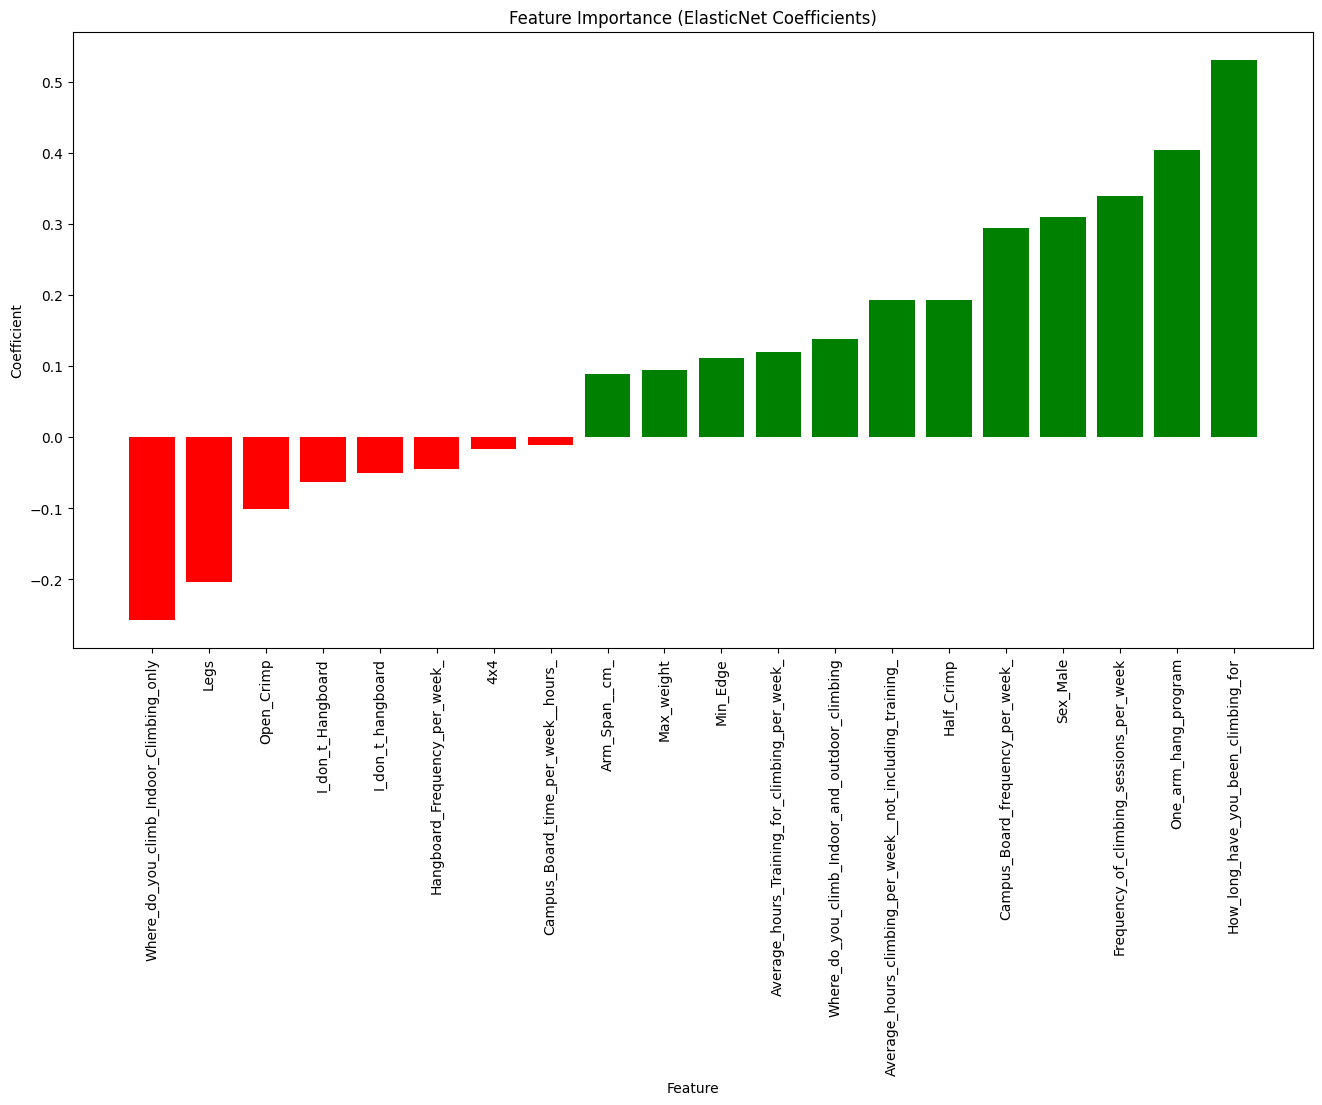

In [39]:
# Plot chosen_features vs coefs
import matplotlib.pyplot as plt
import numpy as np

sorted_idx = np.argsort(coefs)
sorted_features = np.array(chosen_features)[sorted_idx]
sorted_coefs = coefs[sorted_idx]

colors = ['green' if c > 0 else 'red' for c in sorted_coefs]
plt.figure(figsize=(16,8)) 
bars = plt.bar(sorted_features, sorted_coefs, color=colors)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance (ElasticNet Coefficients)')
plt.xticks(rotation=90)
plt.savefig('images/learned_weights.png', bbox_inches='tight')
plt.show()

## Predict my grade!

In [29]:
(my_X, my_y) = formatCode("input_data\mydataFormatted.csv")
float(grid_search4.predict(my_X)[0])

4.4970937875209955